# Day 18: Delta Hedging PnL Simulation

In this notebook, we will simulate the Profit and Loss (PnL) of a delta-hedged portfolio.  
The idea is to track how hedging with the underlying asset helps mitigate option exposure.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
r = 0.01        # Risk-free rate
sigma = 0.2     # Volatility
T = 1.0         # Maturity (1 year)
dt = 1/252      # Daily time step
N = int(T/dt)   # Number of steps
np.random.seed(42)


In [3]:
from scipy.stats import norm

def bs_delta(S, K, T, r, sigma, t):
    tau = T - t
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*tau) / (sigma*np.sqrt(tau))
    return norm.cdf(d1)


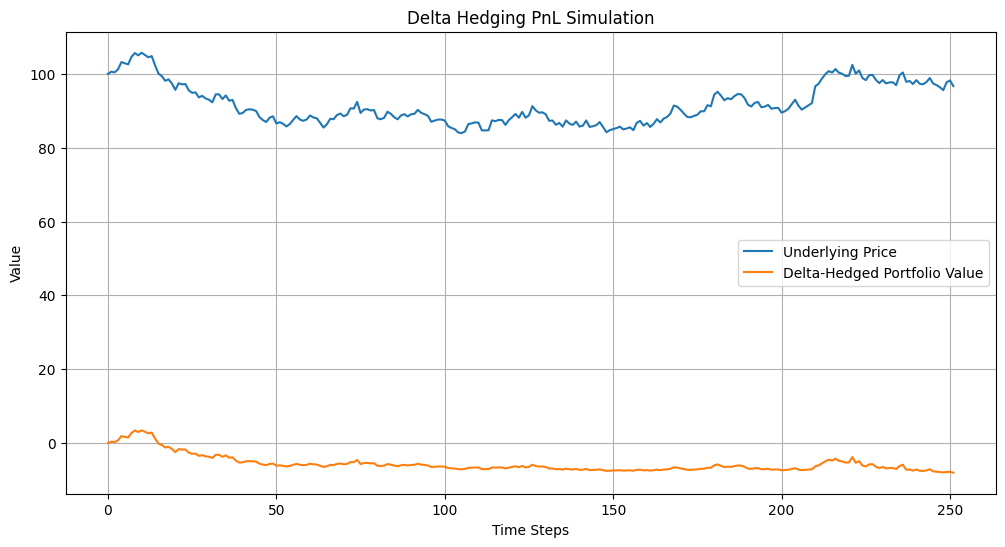

In [4]:
# Simulate stock path
S = np.zeros(N)
S[0] = S0
for i in range(1, N):
    Z = np.random.normal()
    S[i] = S[i-1] * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)

# Track delta hedge PnL
cash = 0
shares = 0
portfolio_values = []

for i in range(N):
    t = i*dt
    delta = bs_delta(S[i], K, T, r, sigma, t)
    # Rebalance hedge
    hedge_change = delta - shares
    cash -= hedge_change * S[i]
    shares = delta
    portfolio_values.append(cash + shares*S[i])

# Plot results
plt.figure(figsize=(12,6))
plt.plot(S, label="Underlying Price")
plt.plot(portfolio_values, label="Delta-Hedged Portfolio Value")
plt.legend()
plt.title("Delta Hedging PnL Simulation")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.grid(True)
plt.show()
